<a href="https://colab.research.google.com/github/MinMolang/keras/blob/master/Keras_Classification_DNN_module_Test(Fashion_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@MINJI PARK 200723
# CNN, DNN, RNN, ResNet, Transformer 수행

"""Reference"""
# DNN TEST reference : https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# #model_dispacher.py
# from sklearn import ensemble
# from sklearn import tree

# models  = {
#     'DNN' : tree.DecisionTreeClassifiter(
#         criterion='gini'
#     ),
#     'RNN' : tree.eDecisionTreeClassifiter(
#         criterion='entropy'
#     ),
#     'ResNet' : ensemble.RandomForestClassifier(),
#  }

**1. module import**

In [83]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import sys
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
TensorFlow version :  2.2.0
Keras version :  2.3.0-tf


In [58]:
#CHECK GPU
!nvidia-smi

Thu Jul 23 04:46:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |    285MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


2. Dataset Read 

In [60]:


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [61]:
# when we check ouput, I'd like to see the name. So let's make a class_names variable.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

3. EDA

In [76]:
print('train_images shape : ',train_images.shape)
print('train_labels length : ',len(train_labels))
print('train_labels  : ',train_labels)

train_images shape :  (60000, 28, 28)
train_labels length :  60000
train_labels  :  [9 0 0 ... 3 0 5]


In [63]:
#Let's see what inside in train_labels Result : [0~9]
from collections import Counter
Counter(train_labels)

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

In [75]:
print('test_images.shape : ',test_images.shape)
print('test_labels length : ',len(test_labels))
print('test_labels  : ',test_labels)

test_images.shape :  (10000, 28, 28)
test_labels length :  10000
test_labels  :  [9 2 1 ... 8 1 5]


3. Data Pre-process

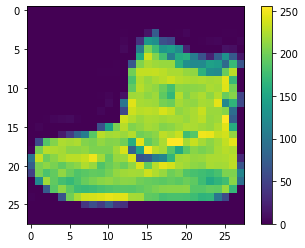

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:   
Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:
by https://www.tensorflow.org/tutorials/keras/classification

In [66]:
train_images = train_images / 255.0

test_images = test_images / 255.0

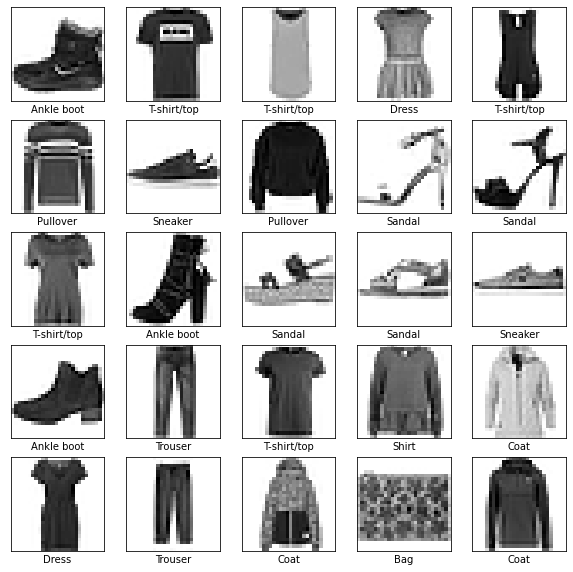

In [67]:
#check the images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [77]:
test_images[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [68]:

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])
# #dens : densly-connected = fully-connected

In [84]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

SKIP THIS, because if we use 'model. add', we can use this visualization. but we are not. It will occur typeerorr 'InputLayer' object is not iterable![대체 텍스트](https://)

In [12]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# %matplotlib inline
# #svg format image resize option >> dpi = 65
# SVG(model_to_dot(model, show_shapes=True ,dpi=65).create(prog='dot', format='svg'))

4. model compile

In [85]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5. train

In [86]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.4957 - accuracy: 0.8263
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3735 - accuracy: 0.8652
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3368 - accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.3122 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2928 - accuracy: 0.8920


6. Evaluate

In [102]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.8673999905586243


In [108]:
predictions = model.predict(test_images)

In [109]:
predictions[0]

array([1.0994295e-05, 1.1404163e-09, 1.0795685e-06, 1.0552515e-06,
       2.7287840e-06, 5.4798257e-02, 2.9682902e-05, 9.1364235e-02,
       4.0479904e-04, 8.5338718e-01], dtype=float32)

In [110]:
np.argmax(predictions[0])

9

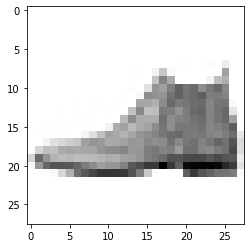

The prediction is Ankle boot and the answer is Ankle boot


In [112]:
n = 0
plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

predict = np.argmax(predictions[0])
answer = test_labels[0]
print(f'The prediction is {class_names[predict]} and the answer is {class_names[answer]}')

In [107]:
# predictions = model.predict_classes(test_images)

6. Let's see More

In [113]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. ref:https://colab.research.google.com/drive/1QDD9hjWdm2Yq6c3FadIwBqMXkfSr41Sr#scrollTo=BrOpIvBx54Q0

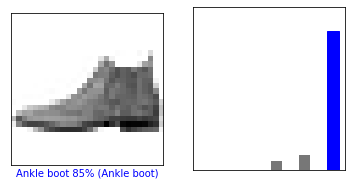

In [114]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

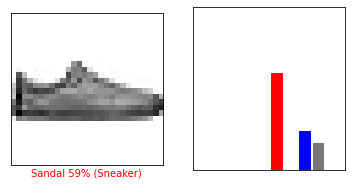

In [116]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's see more

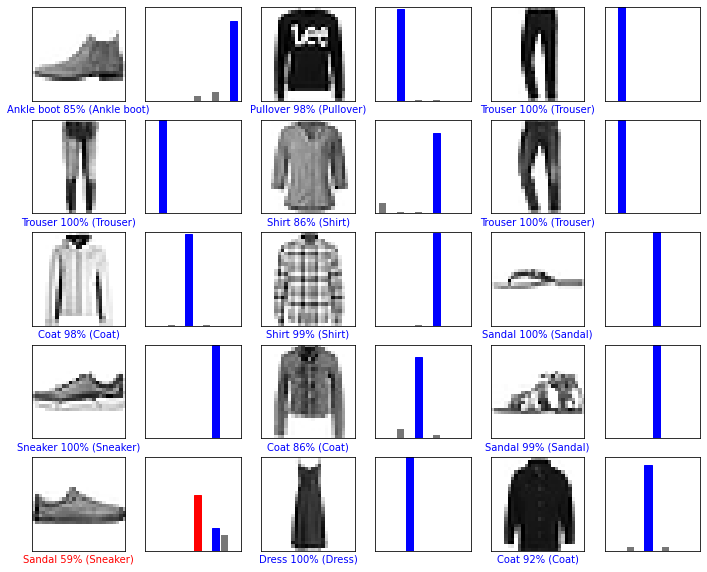

In [120]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# * you have to write predictions not predictions[i]

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Result : 